In [49]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import importlib
from paddleocr import PaddleOCR
import json
import os
import sys
from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from skimage.color import label2rgb

sys.path.append("..")

# Add Python modules here which you are working with, so that you can reload them
# without need of restarting the kernel.
import src.evaluation as evaluation
import src.count_features as count_features
import src.extract_color as extract_color
_ = importlib.reload(extract_color)
_ = importlib.reload(evaluation)
_ = importlib.reload(count_features)
from src.count_features import draw_bounding_boxes, compute_feature_counts, filter_by_feature_count
from src.evaluation import evaluate_filter_functions
from src.extract_color import extract_color,euclidean_Dist,filter_by_color
from src.load_data import load_and_process_eTRIMS

print("Numpy version:", np.__version__)
print("OpenCV version:", cv2.__version__)

Numpy version: 1.26.3
OpenCV version: 4.6.0


<Figure size 640x480 with 0 Axes>

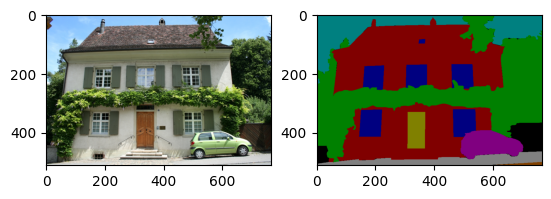

In [50]:
eTRIMS_annotations_folder = "../data/etrims-db_v1/annotations_08etrims-ds"
eTRIMS_images_folder = "../data/etrims-db_v1/images_08_etrims-ds"

data = load_and_process_eTRIMS(eTRIMS_annotations_folder, eTRIMS_images_folder)

plt.figure()
# rows, columns
f, axarr = plt.subplots(1,2)

axarr[0].imshow(list(data.values())[0].image)
axarr[1].imshow(list(data.values())[0].annotation)
plt.show()

In [51]:
image_name = 'bonn_000047'
image = data[image_name].image
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
annotation = data[image_name].annotation

radius = 2
n_points = 8 * radius

lbp = local_binary_pattern(image, n_points, radius, method='uniform')

<Figure size 640x480 with 0 Axes>

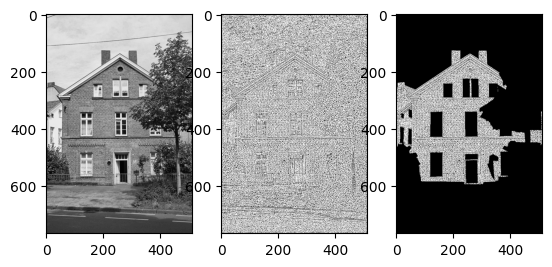

In [52]:
mask_int = data[image_name].masks['building'].astype(np.uint8)
mask_bool = data[image_name].masks['building'].astype(bool)
masked = cv2.bitwise_and(lbp, lbp, mask=mask_int)

plt.figure()
# rows, columns
f, axarr = plt.subplots(1,3)

axarr[0].imshow(image)
axarr[1].imshow(lbp)
axarr[2].imshow(masked)
plt.show()

393216
109274
393216
393216
393216


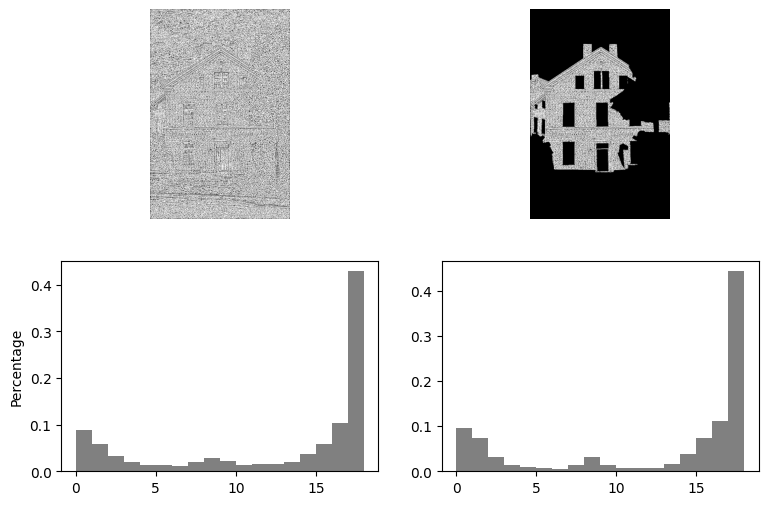

In [55]:
def hist_no_mask(ax, lbp):
    n_bins = int(lbp.max() + 1)
    return ax.hist(lbp.ravel(), density=True, bins=n_bins, range=(0, n_bins),
                   facecolor='0.5')

def hist_mask(ax, lbp):
    n_bins = int(lbp.max() + 1)
    return ax.hist(lbp[mask_bool], density=True, bins=n_bins, range=(0, n_bins),
                   facecolor='0.5')
    
fig, (ax_img, ax_hist) = plt.subplots(nrows=2, ncols=2, figsize=(9, 6))
plt.gray()

ax_img[0].imshow(lbp)
ax_img[1].imshow(masked)

counts, _, bars = hist_no_mask(ax_hist[0], lbp)
counts, _, bars = hist_mask(ax_hist[1], lbp)

ax_hist[0].set_ylabel('Percentage')
for ax in ax_img:
    ax.axis('off')